<a href="https://colab.research.google.com/github/KodakV/train_datasets/blob/master/ClassificationNumber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random
import torch
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deteministic=True

In [ ]:
torch.cuda.is_available()

True

In [ ]:
!nvidia-smi


Thu May 28 21:03:31 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    31W / 250W |   7729MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [ ]:
import torchvision.datasets

MNIST_train=torchvision.datasets.MNIST('./', download=True,train=True)
MNIST_test=torchvision.datasets.MNIST('./',download=True, train=False)



In [ ]:
X_train=MNIST_train.train_data
y_train=MNIST_train.train_labels

X_test=MNIST_test.test_data
y_test=MNIST_test.test_labels

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:45: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:45: UserWarning: train_labels has been renamed targets
  war

In [ ]:
X_train=X_train.float()
X_test=X_test.float()

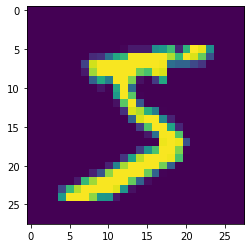

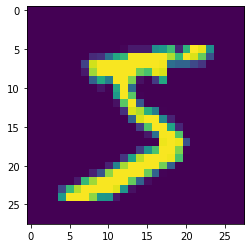

In [ ]:
#рисование картинок
import matplotlib.pyplot as plt
plt.imshow(X_train[0,:,:])
plt.show()

In [ ]:
X_train=X_train.reshape([-1,28*28])
X_test=X_test.reshape([-1,28*28])

In [ ]:
class MNISTNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(MNISTNet, self).__init__()
        self.fc1 = torch.nn.Linear(28 * 28, n_hidden_neurons)
        self.ac1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 10) 
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        return x
    
mnist_net = MNISTNet(100)

loss=torch.nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(mnist_net.parameters(),lr=0.001)


In [ ]:
device=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
mnist_net=mnist_net.to(device)
list(mnist_net.parameters())

In [ ]:
batch_size = 100

test_accuracy_history = []
test_loss_history = []

train_accuracy_history = []
train_loss_history = []


X_test = X_test.to(device)
y_test = y_test.to(device)
X_train=X_train.to(device)
y_train=y_train.to(device)

for epoch in range(10000):
    order = np.random.permutation(len(X_train))
    
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)
        
        preds = mnist_net.forward(X_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()

    test_preds = mnist_net.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test))
    
    train_preds = mnist_net.forward(X_train)
    train_loss_history.append(loss(train_preds, y_train))
    
    accuracy_test = (test_preds.argmax(dim=1) == y_test).float().mean()
    accuracy_train = (train_preds.argmax(dim=1) == y_train).float().mean()
    test_accuracy_history.append(accuracy_test)
    train_accuracy_history.append(accuracy_train)
    print(accuracy_test)

tensor(0.9105, device='cuda:0')
tensor(0.9071, device='cuda:0')
tensor(0.9141, device='cuda:0')
tensor(0.9213, device='cuda:0')
tensor(0.9238, device='cuda:0')
tensor(0.9245, device='cuda:0')
tensor(0.9251, device='cuda:0')
tensor(0.9269, device='cuda:0')
tensor(0.9245, device='cuda:0')
tensor(0.9323, device='cuda:0')
tensor(0.9309, device='cuda:0')
tensor(0.9335, device='cuda:0')
tensor(0.9389, device='cuda:0')
tensor(0.9344, device='cuda:0')
tensor(0.9358, device='cuda:0')
tensor(0.9389, device='cuda:0')
tensor(0.9377, device='cuda:0')
tensor(0.9316, device='cuda:0')
tensor(0.9358, device='cuda:0')
tensor(0.9424, device='cuda:0')
tensor(0.9423, device='cuda:0')
tensor(0.9425, device='cuda:0')
tensor(0.9445, device='cuda:0')
tensor(0.9451, device='cuda:0')
tensor(0.9440, device='cuda:0')
tensor(0.9426, device='cuda:0')
tensor(0.9478, device='cuda:0')
tensor(0.9432, device='cuda:0')
tensor(0.9454, device='cuda:0')
tensor(0.9461, device='cuda:0')
tensor(0.9425, device='cuda:0')
tensor(0

KeyboardInterrupt: ignored

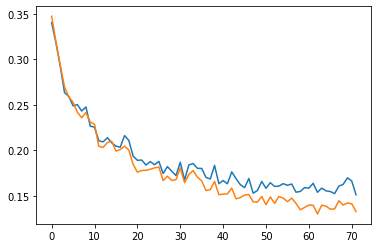

In [ ]:
import pylab
from matplotlib import mlab

plt.plot(test_accuracy_history)
plt.plot(train_accuracy_history)
plt.plot(test_loss_history);
plt.plot(train_loss_history);